# Least Squares Method with Low-level API

Note: This notebook is desinged to run with Python3 and CPU (no GPU) runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_cpu.png)

Install TensorFlow 1.14.0.

In [1]:
%%bash
tf_version='1.14.0'
if pip freeze | grep -q "^tensorflow==${tf_version}$"; then
  echo "tensorflow==${tf_version} is already installed. No actions are required."
else
  echo "Installing tensorflow==${tf_version}. Don't forget to restart the runtime."
  pip install tensorflow==${tf_version}
fi

tensorflow==1.14.0 is already installed. No actions are required.


####[LSL-01]
Import modules.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

####[LSL-02]
Prepare the training dateset.

In [0]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4,
                    25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12, 1])
train_x = np.array([[mon**n for n in range(0, 5)]
                    for mon in range(1, 13)])

####[LSL-03]
`train_x` contains the list $[x^0, x^1, x^2, x^3, x^4]$ for $x=1,...,12$.

In [4]:
train_x

array([[    1,     1,     1,     1,     1],
       [    1,     2,     4,     8,    16],
       [    1,     3,     9,    27,    81],
       [    1,     4,    16,    64,   256],
       [    1,     5,    25,   125,   625],
       [    1,     6,    36,   216,  1296],
       [    1,     7,    49,   343,  2401],
       [    1,     8,    64,   512,  4096],
       [    1,     9,    81,   729,  6561],
       [    1,    10,   100,  1000, 10000],
       [    1,    11,   121,  1331, 14641],
       [    1,    12,   144,  1728, 20736]])

####[LSL-04]
`train_t` contins the corresponding lables for $x=1,...,12$.

In [5]:
train_t

array([[ 5.2],
       [ 5.7],
       [ 8.6],
       [14.9],
       [18.2],
       [20.4],
       [25.5],
       [26.4],
       [22.8],
       [17.5],
       [11.1],
       [ 6.6]])

####[LSL-05]
Definie a placeholder to hold the training dataset.

In [0]:
x = tf.placeholder(tf.float32, [None, 5])

####[LSL-06]
Definie variables for weights.

In [0]:
w = tf.Variable(tf.zeros([5, 1]))

####[LSL-07]
Definie a ploynomial to predict label values.

In [0]:
y = tf.matmul(x, w)

####[LSL-08]
Definie a placeholder to hold the label values.

In [0]:
t = tf.placeholder(tf.float32, [None, 1])

####[LSL-09]
Definine a loss function as Square error.

In [0]:
loss = tf.reduce_sum(tf.square(y-t))

####[LSL-10]
Define an optimization step  using the Adam optimizer

In [0]:
train_step = tf.train.AdamOptimizer().minimize(loss)

####[LSL-11]
Create a session and initialize variables.

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

####[LSL-12]
Apply the optimization step for 100,000 epochs.

In [13]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print ('Step: {}, Loss: {}'.format(i, loss_val))

Step: 10000, Loss: 31.012832641601562
Step: 20000, Loss: 29.292377471923828
Step: 30000, Loss: 28.031116485595703
Step: 40000, Loss: 27.911422729492188
Step: 50000, Loss: 25.769744873046875
Step: 60000, Loss: 24.764514923095703
Step: 70000, Loss: 23.839672088623047
Step: 80000, Loss: 22.97088050842285
Step: 90000, Loss: 22.467998504638672
Step: 100000, Loss: 21.445119857788086


####[LSL-13]
Show weights after the training.

In [14]:
sess.run(w)

array([[ 3.7658305 ],
       [-1.5907954 ],
       [ 1.7854367 ],
       [-0.20124646],
       [ 0.00536682]], dtype=float32)

####[LSL-14]
Define a function to predict values using the final weights.

In [0]:
ws = sess.run(w)
def predict(x):
    pred = sum([ws[n][0] * x**n for n in range(0, 5)])
    return pred

####[LSL-15]
Plot a chart for predictions.

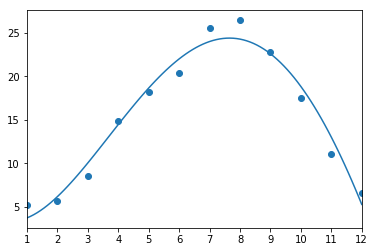

In [16]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 12)
subplot.set_xticks(range(1, 13))
subplot.scatter(range(1, 13), train_t)
xs = np.linspace(1, 12, 100)
ys = predict(xs)
subplot.plot(xs, ys)